### Looking at Parcel, Unift, and Appraisal Data together

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [93]:
consolidated_data = pd.read_csv(r"C:\Users\nrebovich\Desktop\Unfit Data Cleaned.csv")

In [94]:
consolidated_data.columns
numeric_data = consolidated_data[['ACRE','RESfquality','RESfyrblt','AppraisedLand2020','AppraisedBuilding2020','AppraisedTotal2020','AppraisedLand2019','AppraisedBuilding2019','AppraisedTotal2019','AppraisedValueChange20_19','Unfit','ImprovementValue']]

In [95]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numeric_data.describe()

,ACRE,RESfquality,RESfyrblt,AppraisedLand2020,AppraisedBuilding2020,AppraisedTotal2020,AppraisedLand2019,AppraisedBuilding2019,AppraisedTotal2019,AppraisedValueChange20_19,Unfit,ImprovementValue
count,50275.00,49584.00,49584.00,50275.00,50275.00,50275.00,50272.00,50272.00,50272.00,50272.00,50275.00,423.00
mean,0.53,2.78,1952.92,19143.71,100594.95,119738.67,18411.58,92420.67,110832.24,8910.42,0.01,67600.69
std,2.27,0.40,28.41,29695.74,217674.53,239117.57,26930.83,198846.81,218560.83,40022.93,0.09,318545.74
min,0.01,1.00,1851.00,0.00,0.00,0.00,0.00,0.00,0.00,-1497600.00,0.00,180.00
25%,0.14,2.33,1930.00,8090.00,44650.00,53660.00,7990.00,39000.00,47840.00,3220.00,0.00,10450.00
50%,0.21,2.67,1952.00,15630.00,79540.00,96800.00,15530.00,72290.00,88520.00,6500.00,0.00,23540.00
75%,0.34,3.00,1968.00,22900.00,127200.00,150000.00,22520.00,116930.00,139000.00,10300.00,0.00,41010.00
max,174.64,5.83,2019.00,2578660.00,24110740.00,26689400.00,2546150.00,18301850.00,20848000.00,5841400.00,1.00,3529970.00


In [96]:
numeric_array = numeric_data['Unfit'].to_numpy()
numeric_array

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

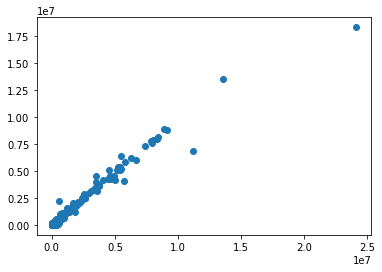

In [97]:
plt.scatter(numeric_data['AppraisedBuilding2020'],numeric_data['AppraisedBuilding2019'], label = numeric_array)

In [120]:
unfit_df = numeric_data.loc[(numeric_data.Unfit == 1)]
fit_df = numeric_data.loc[(numeric_data.Unfit == 0)]
unfit_df.shape

(423, 12)

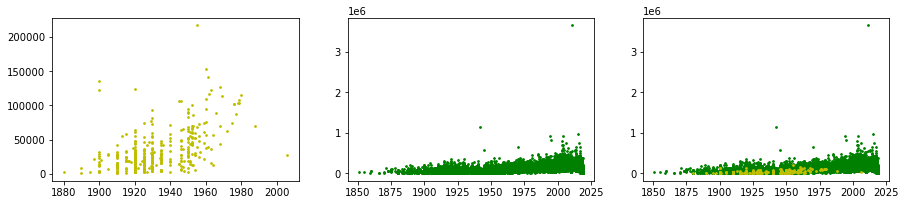

In [116]:
#plot unfit, then fit, then both
plt.figure(figsize=(15,3))
targets = ['Fit','Unfit']
colors = ["y","g"]

plt.subplot(131)
plt.scatter(unfit_df['RESfyrblt'],unfit_df['AppraisedBuilding2019'], c = 'y', s = 3)

plt.subplot(132)
plt.scatter(fit_df['RESfyrblt'],fit_df['AppraisedBuilding2019'], c = 'g', s = 3)

plt.subplot(133)
plt.scatter(fit_df['RESfyrblt'],fit_df['AppraisedBuilding2019'], c = 'g', s = 3)
plt.scatter(unfit_df['RESfyrblt'],unfit_df['AppraisedBuilding2019'], c = 'y', s = 3)

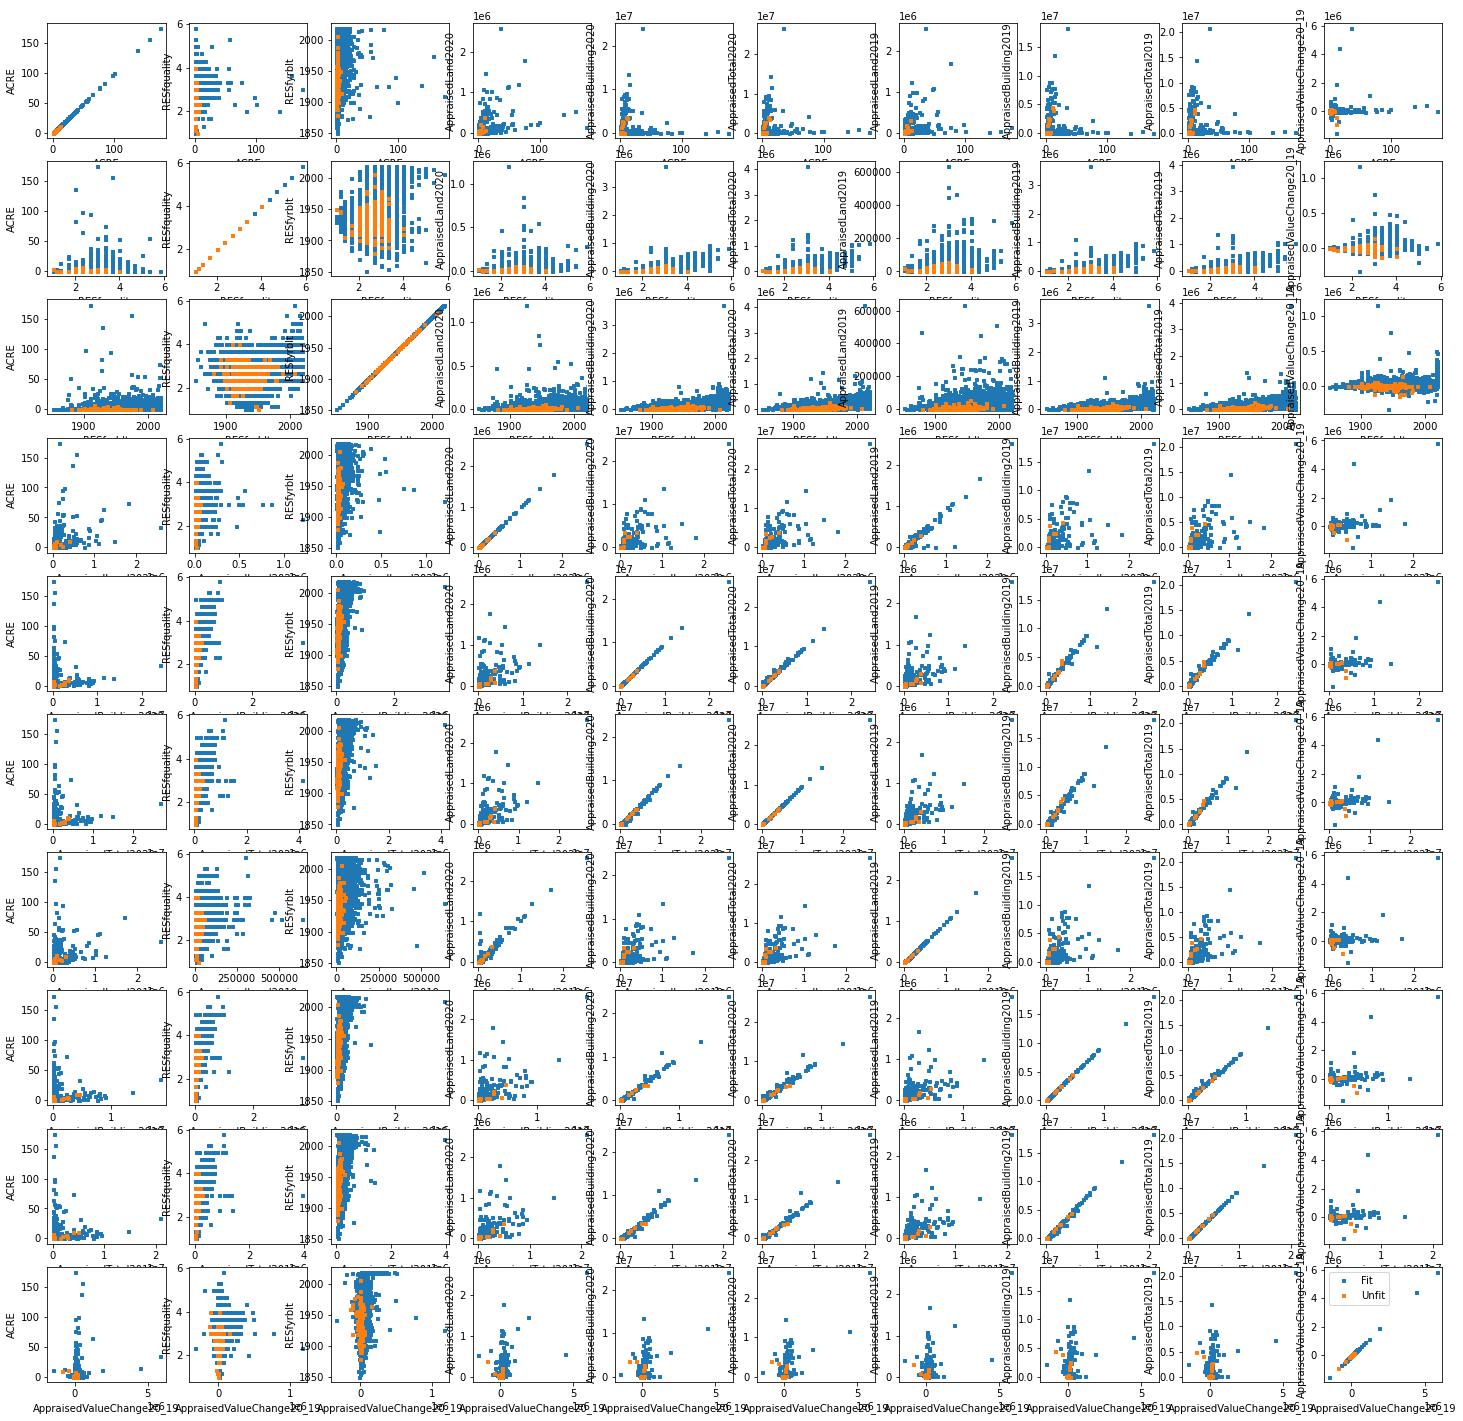

In [145]:
fig, ax = plt.subplots(10,10, figsize=(25,25))

for i in range (0,10):
    for j in range (0,10):
        ax[i,j].plot(fit_df[fit_df.columns[i]], fit_df[fit_df.columns[j]], marker ="s", linestyle="", label="Fit", markersize = 3)
        ax[i,j].plot(unfit_df[unfit_df.columns[i]], unfit_df[unfit_df.columns[j]], marker ="s", linestyle="", label="Unfit", markersize = 3)
        ax[i,j].set_xlabel(fit_df.columns[i])
        ax[i,j].set_ylabel(fit_df.columns[j])
plt.legend()
plt.show()